In [1]:
import pandas as pd
import matplotlib.pyplot as plt



# Carregue o arquivo vendas.csv em um DataFrame

In [2]:
vendas = pd.read_csv('/content/drive/MyDrive/projeto alura/vendas.csv')
print(vendas.head())


   id_venda  data_venda  id_cliente  id_produto                     produto  \
0         1  2023-02-07         109           8  Livro: A Guerra dos Tronos   
1         2  2023-01-11         139           7        Headset Surround 7.1   
2         3  2023-02-16         104          17          Mousepad Gamer XXL   
3         4  2023-03-20         145          17          Mousepad Gamer XXL   
4         5  2023-02-16         134          16       Memória RAM 16GB DDR5   

     categoria  valor_venda  quantidade  
0       Livros      2677.12           2  
1        Áudio      1210.10           1  
2  Periféricos      2393.06           2  
3  Periféricos      3925.92           3  
4  Componentes      4702.89           1  


In [3]:
display(vendas.describe())

,id_venda,id_cliente,id_produto,valor_venda,quantidade
count,120.000000,120.00000,120.000000,120.000000,120.000000
mean,60.500000,124.15000,9.650000,2742.479750,2.425000
std,34.785054,12.73957,5.376028,1399.236646,1.149808
min,1.000000,101.00000,1.000000,55.020000,1.000000
25%,30.750000,114.00000,6.000000,1543.417500,1.000000
50%,60.500000,124.00000,10.000000,2812.445000,2.000000
75%,90.250000,134.00000,13.000000,3922.972500,3.000000
max,120.000000,149.00000,19.000000,4976.810000,4.000000


#Limpeza

### Verifique a existência de dados ausentes

In [4]:
print (vendas.isnull().sum())


id_venda       0
data_venda     0
id_cliente     0
id_produto     0
produto        0
categoria      0
valor_venda    0
quantidade     0
dtype: int64


In [5]:
print(vendas.isnull().values.any())


False


### Verificar dados duplicados

In [6]:
# Verifica se há linhas duplicadas
print(vendas.duplicated().sum())



0


In [7]:
# Exibe as linhas duplicadas, se houver
print(vendas[vendas.duplicated()])


Empty DataFrame
Columns: [id_venda, data_venda, id_cliente, id_produto, produto, categoria, valor_venda, quantidade]
Index: []


##Calcule o faturamento total


In [8]:
vendas['faturamento']=vendas['quantidade']*vendas['valor_venda']
print(vendas.head())

   id_venda  data_venda  id_cliente  id_produto                     produto  \
0         1  2023-02-07         109           8  Livro: A Guerra dos Tronos   
1         2  2023-01-11         139           7        Headset Surround 7.1   
2         3  2023-02-16         104          17          Mousepad Gamer XXL   
3         4  2023-03-20         145          17          Mousepad Gamer XXL   
4         5  2023-02-16         134          16       Memória RAM 16GB DDR5   

     categoria  valor_venda  quantidade  faturamento  
0       Livros      2677.12           2      5354.24  
1        Áudio      1210.10           1      1210.10  
2  Periféricos      2393.06           2      4786.12  
3  Periféricos      3925.92           3     11777.76  
4  Componentes      4702.89           1      4702.89  


## Agrupe os dados por mês para visualizar a tendência de faturamento.


In [9]:
vendas['data_venda']= pd.to_datetime(vendas['data_venda'])
vendas['mes_venda']=vendas['data_venda'].dt.month
faturamento_por_mes=vendas.groupby('mes_venda')['faturamento'].sum()
print (faturamento_por_mes)

mes_venda
1    234634.61
2    282351.34
3    293842.93
Name: faturamento, dtype: float64


Agrupe os dados por categoria para entender a distribuição do faturamento.

In [10]:
faturamento_por_categoria=vendas.groupby('categoria')['faturamento'].sum()
print(faturamento_por_categoria)

categoria
Colecionáveis     55658.46
Componentes       35468.07
Decoração        109156.43
Eletrônicos      124973.54
Livros           140285.75
Móveis             8083.34
Periféricos      307921.82
Áudio             29281.47
Name: faturamento, dtype: float64


## Um gráfico de linha mostrando o faturamento total por mês.

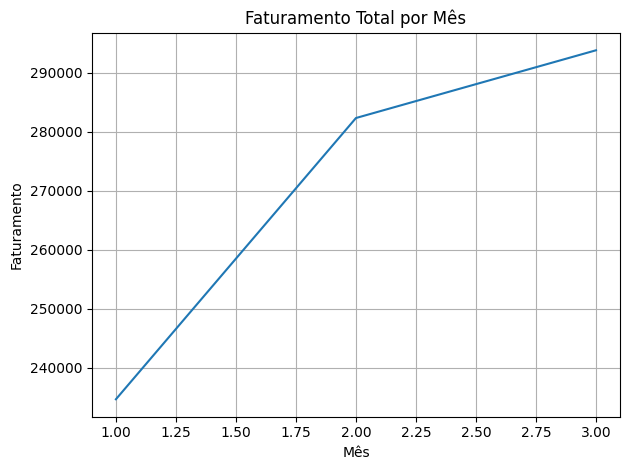

In [11]:
faturamento_por_mes.plot(kind='line', title='Faturamento Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.grid(True)
plt.tight_layout()
plt.show()

## Um gráfico de barras mostrando o faturamento total por categoria.

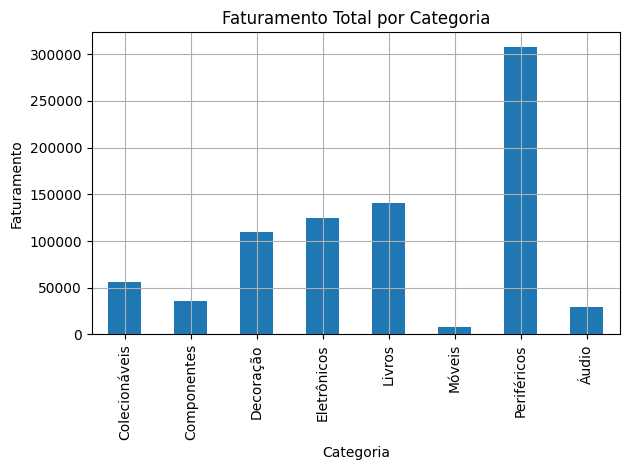

In [12]:
faturamento_por_categoria.plot(kind='bar', title='Faturamento Total por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Faturamento')
plt.grid(True)
plt.tight_layout()
plt.show()


## Salvando o arquivo limpo

In [13]:
vendas.to_csv("/content/drive/MyDrive/projeto alura/vendas_limpo.csv", index=False, encoding='utf-8')